In [1]:
#https://medium.com/neuronio-br/prevendo-valores-de-a%C3%A7%C3%B5es-com-lstm-b7b3a737aa4
#https://github.com/alexavierc/LSTM-Stock-Prices
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM,Dense
from keras.utils import plot_model
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('csv/warning.csv')
df.head()

,casos,data
0,1,2018-08-23T03:00:00.000Z
1,1,2018-09-16T03:00:00.000Z
2,1,2018-05-17T03:00:00.000Z
3,1,2018-12-05T02:00:00.000Z
4,1,2018-11-27T02:00:00.000Z


In [5]:
df = pd.read_csv('csv/warning.csv')
#df["data"] = df["data"].str.slice(0, 10, 1) 
df['data'] = pd.to_datetime(df['data'])
df.set_index('data', inplace=True)
#df.plot.bar(figsize=(12, 6));
df.head()

,casos
data,
2018-08-23 03:00:00+00:00,1
2018-09-16 03:00:00+00:00,1
2018-05-17 03:00:00+00:00,1
2018-12-05 02:00:00+00:00,1
2018-11-27 02:00:00+00:00,1


In [6]:
#Data normalization
array = df.values.reshape(df.shape[0],1)
array[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
array = scl.fit_transform(array)
array[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [8]:
look_back = 40
forward_days = 10
num_periods = 5

In [9]:
#split in Train and Test
division = len(array) - num_periods*forward_days
array_test = array[division-look_back:]
array_train = array[:division]

In [10]:
#Get the data and splits in input X and output Y, by spliting in `n` past days as input X 
#and `m` coming days as Y.
def processData(data, look_back, forward_days,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+forward_days)])
    return np.array(X),np.array(Y)

In [11]:
X_test,y_test = processData(array_test,look_back,forward_days,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,forward_days)
y = np.array([list(a.ravel()) for a in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(998, 40, 1)
(250, 40, 1)
(5, 40, 1)
(998, 10)
(250, 10)
(5, 10)


In [13]:
#Optionaly, you can load a model
#model = load_model('Trained/single-company/LSTM_compA_LB40_FD10_E50_F50_S30.h5')

In [14]:
#create modal
NUM_NEURONS_FirstLayer = 50
NUM_NEURONS_SecondLayer = 30
EPOCHS = 50

#Build the model
model = Sequential()
model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,1), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(forward_days))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=2, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 998 samples, validate on 250 samples
Epoch 1/50
 - 53s - loss: 0.0282 - val_loss: 0.0258
Epoch 2/50
 - 51s - loss: 0.0266 - val_loss: 0.0255
Epoch 3/50
 - 51s - loss: 0.0265 - val_loss: 0.0254
Epoch 4/50
 - 51s - loss: 0.0262 - val_loss: 0.0255
Epoch 5/50
 - 51s - loss: 0.0264 - val_loss: 0.0256
Epoch 6/50
 - 51s - loss: 0.0262 - val_loss: 0.0251
Epoch 7/50
 - 51s - loss: 0.0262 - val_loss: 0.0254
Epoch 8/50
 - 51s - loss: 0.0261 - val_loss: 0.0255
Epoch 9/50
 - 51s - loss: 0.0261 - val_loss: 0.0252
Epoch 10/50
 - 52s - loss: 0.0259 - val_loss: 0.0254
Epoch 11/50
 - 52s - loss: 0.0258 - val_loss: 0.0253
Epoch 12/50
 - 51s - loss: 0.0258 - val_loss: 0.0254
Epoch 13/50
 - 51s - loss: 0.0258 - val_loss: 0.0248
Epoch 14/50
 - 52s - loss: 0.0260 - val_loss: 0.0249
Epoch 15/50
 - 52s - loss: 0.0255 - val_loss: 0.0247
Epoch 16/50
 - 51s - loss: 0.0253 - val_loss: 0.

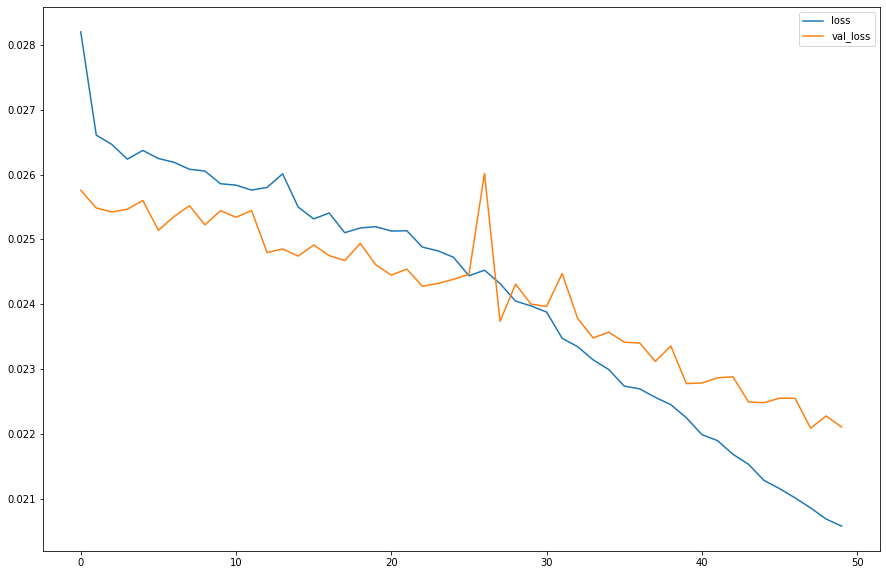

In [15]:
plt.figure(figsize = (15,10))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

In [16]:
#Saving the model
file_name = 'model/LSTM_compA_LB{}_FD{}_E{}_F{}_S{}.h5'.format(look_back, forward_days, EPOCHS, NUM_NEURONS_FirstLayer, NUM_NEURONS_SecondLayer)
model.save(file_name)
print("Saved model `{}` to disk".format(file_name))

Saved model `model/LSTM_compA_LB40_FD10_E50_F50_S30.h5` to disk


In [17]:
#Predicting the Test 
Xt = model.predict(X_test)

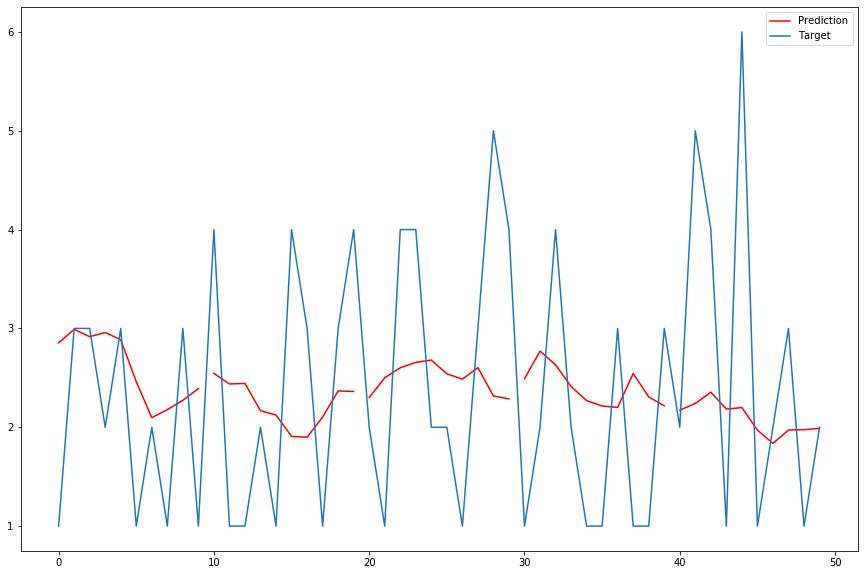

In [18]:
plt.figure(figsize = (15,10))

for i in range(0,len(Xt)):
    plt.plot([x + i*forward_days for x in range(len(Xt[i]))], scl.inverse_transform(Xt[i].reshape(-1,1)), color='r')
    
plt.plot(0, scl.inverse_transform(Xt[i].reshape(-1,1))[0], color='r', label='Prediction') #only to place the label
    
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label='Target')
plt.legend(loc='best')
plt.show()

In [19]:
#Predicting all the data
division = len(array) - num_periods*forward_days

leftover = division%forward_days+1

array_test = array[division-look_back:]
array_train = array[leftover:division]


In [20]:
Xtrain,ytrain = processData(array_train,look_back,forward_days,forward_days)
Xtest,ytest = processData(array_test,look_back,forward_days,forward_days)

In [21]:
Xtrain = model.predict(Xtrain)
Xtrain = Xtrain.ravel()

Xtest = model.predict(Xtest)
Xtest = Xtest.ravel()

In [22]:
y = np.concatenate((ytrain, ytest), axis=0)

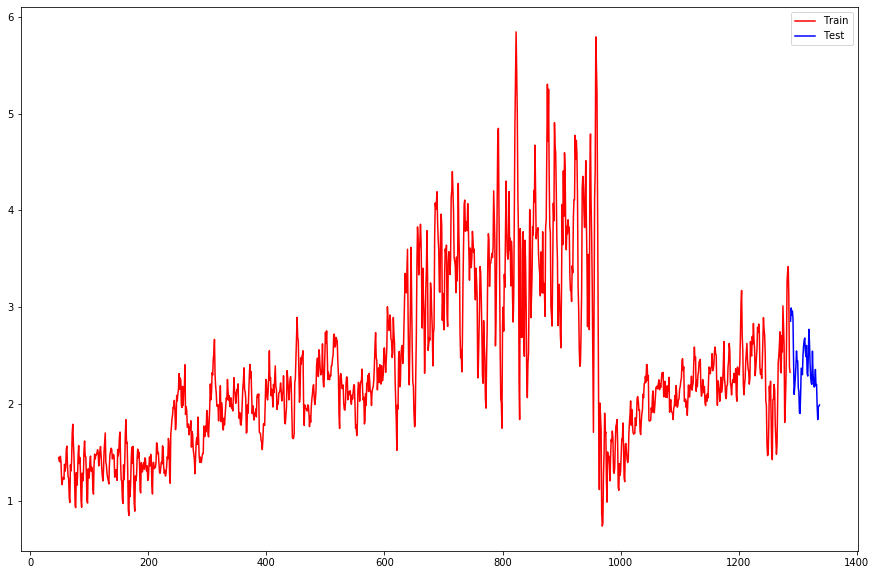

In [26]:
plt.figure(figsize = (15,10))

# Data in Train/Validation
plt.plot([x for x in range(look_back+leftover, len(Xtrain)+look_back+leftover)], scl.inverse_transform(Xtrain.reshape(-1,1)), color='r', label='Train')
# Data in Test
plt.plot([x for x in range(look_back +leftover+ len(Xtrain), len(Xtrain)+len(Xtest)+look_back+leftover)], scl.inverse_transform(Xtest.reshape(-1,1)), color='b', label='Test')

#Data used
#plt.plot([x for x in range(look_back+leftover, look_back+leftover+len(Xtrain)+len(Xtest))], scl.inverse_transform(y.reshape(-1,1)), color='b', label='Target')

#Initial data. It should overlap the data used
#plt.plot(scl.inverse_transform(array), color='#BDCCFF', label='Esperado')

plt.legend(loc='best')
plt.show()